<a href="https://colab.research.google.com/github/vaguiarfinance/AprendizadoDNC/blob/main/Regress%C3%A3oLinear_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Vamos adicionar o dataset e exibi-lo para que termos o primeiro contato
imoveis = pd.read_excel("Cópia de imoveis.xlsx")
imoveis.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [3]:
# Analisando os dados com o describe
imoveis.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [4]:
# Observando se o dataset possui dados nulos
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


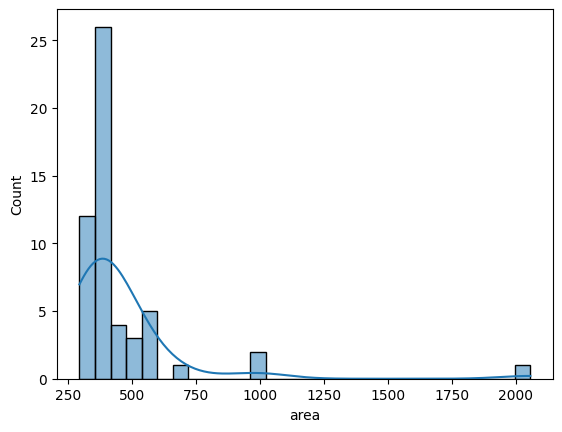

In [9]:
# Plotando um grafico de histograma da biblioteca seaborn, cujo o dataset é imoveis e o ; é para retirar o link gerado que normalmente fica em cima do gráfico
sns.histplot(imoveis, x="area", kde=True);

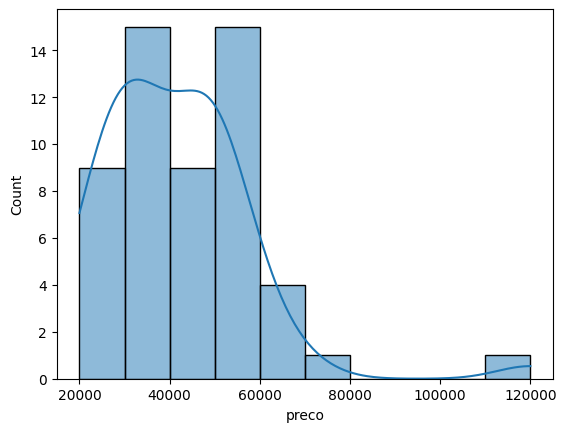

In [10]:
# Criamos o gráfico com o eixo X sendo o Preço
sns.histplot(imoveis, x="preco", kde=True);

In [11]:
# Observando a correlação
imoveis.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


51% há pouca correlação, uma correlação boa é acima de 70%, mas tbm não podemos considerar uma hipotese nula, visto que teve 51%.

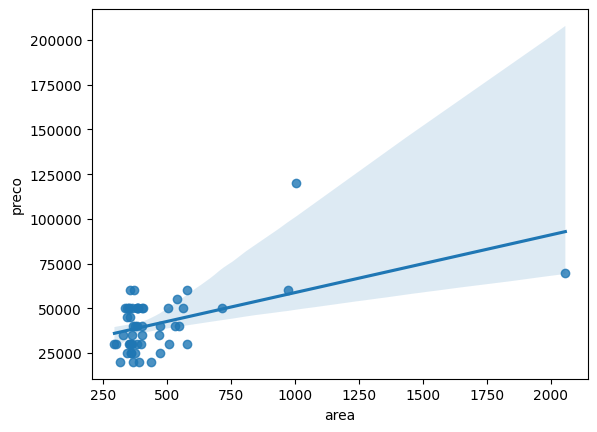

In [14]:
sns.regplot(data=imoveis, x="area", y="preco");

In [16]:
# Observamos que a area esta na casa das centenas, enquanto que a média do preço esta na casa dos milhares
imoveis.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [17]:
# Vamos transformar os dados em medida de normalização - (0 até 1) Escala logarítmica

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Vamos Transformar o dados, porém eu quero que mantenha o index e as colunas
imovel_norm = pd.DataFrame(scaler.fit_transform(imoveis), index=imoveis.index, columns=imoveis.columns)

In [18]:
# Vamos ver como  ficou
imovel_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [19]:
# Podemos notar que a coisas fica mais proxima da normal agora
imovel_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


<Axes: xlabel='area', ylabel='preco'>

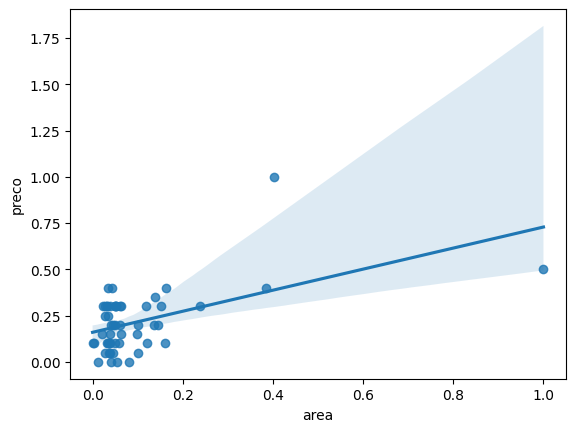

In [20]:
# Observe a escala, como alterou em relação ao gráfico gerado anteriormente

sns.regplot(data=imovel_norm, x="area", y="preco");

In [25]:
import statsmodels.formula.api as smf

In [33]:
#modelo MRLS
function = 'preco~area-1'
model = smf.ols(formula=function, data=imovel_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.473
Model:                            OLS   Adj. R-squared (uncentered):              0.463
Method:                 Least Squares   F-statistic:                              47.56
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                    6.62e-09
Time:                        19:04:30   Log-Likelihood:                          11.695
No. Observations:                  54   AIC:                                     -21.39
Df Residuals:                      53   BIC:                                     -19.40
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
x = imovel_norm[["area"]]

y= imovel_norm[["preco"]]

In [36]:
# Vamos criar as areas de Teste e de Treino, sendo 20% Teste e 80% Treino, com 42 amostras aleatórias

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.20, random_state=42)

#Criando o algotimo de Machine Learning

lr = LinearRegression()
lr.fit(x_treino, y_treino)
LinearRegression()

LinearRegression()

In [37]:
r_sq = lr.score(x_treino, y_treino)
print(r_sq)

0.2754399686961232


In [39]:
# Vamos ver a MAE (Erro Médio Absoluto) calculado pelo almoritmo

y_pred_treino = lr.predict(x_treino)

print("MAE:", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE:", metrics.mean_squared_error(y_treino, y_pred_treino))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.1068423059800295
MSE: 0.019987119738590717
RMSE: 0.1413758103021543


In [40]:
# Construindo o algoritmo de teste
lr.fit(x_teste, y_teste)

LinearRegression()

In [42]:
y_pred_teste = lr.predict(x_teste)
print("MAE:", metrics.mean_absolute_error(y_teste, y_pred_teste))
print("MSE:", metrics.mean_squared_error(y_teste, y_pred_teste))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE: 0.10852020952335328
MSE: 0.01746864564020875
RMSE: 0.13216900408268478


Os valores ficaram bem parecidos para Treino e Teste

É muito importante entender as métricas de sucesso de uma algoritmo